In [1]:
# Calculate what the doppler drift would be for different frequencies 
# for transmitters traveling at different speeds and how that
# compares to the COSMIC sensitivity


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Given a relative acceleration between transmitter
# and observer in m/s^2 and a frequency in Hz
# returns the drift rate in Hz/s
# From https://arxiv.org/pdf/1910.01148
def drift_rate(acceleration, frequency):
    c = 3e8 # m/s
    return frequency * acceleration / c

In [4]:
# Look at affect of acceleration from Earth's rotation
# at maximum
radius = 6371 * 1000 # meters
circumference = 2 * np.pi * radius # meters
s_in_day = 1 * 24 * 60 * 60 # seconds
tangential_velocity = circumference / s_in_day # m/s
centripetal_acc = tangential_velocity**2 / radius # m/s^2
print("Centripetal acceleration from the Earth", centripetal_acc, "m/s^2")

Centripetal acceleration from the Earth 0.03369301356703334 m/s^2


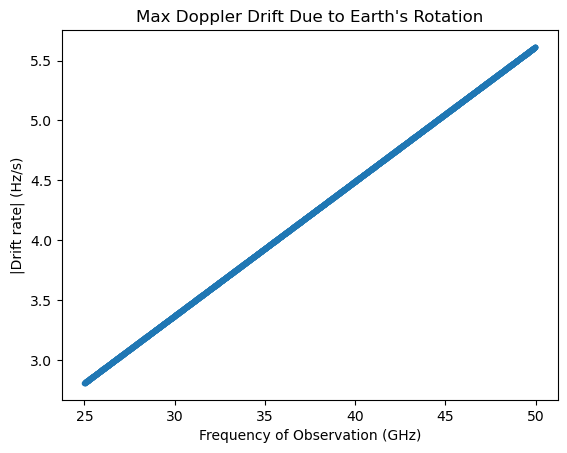

In [5]:
frequencies = np.arange(25e9, 50e9, 1e7) # 25-50GHz
plt.plot(frequencies / 1e9, drift_rate(centripetal_acc, frequencies), marker='.')
plt.xlabel("Frequency of Observation (GHz)")
plt.ylabel("|Drift rate| (Hz/s)")
plt.title("Max Doppler Drift Due to Earth's Rotation")
plt.show()

In [6]:
# Figure out what acceleration an object must be going to have a drift rate > .25hz/s
drift_threshold = 0.25 # hz/s
def accel_from_drift(drift, frequency):
    c = 3e8 # m/s
    return drift * c / frequency

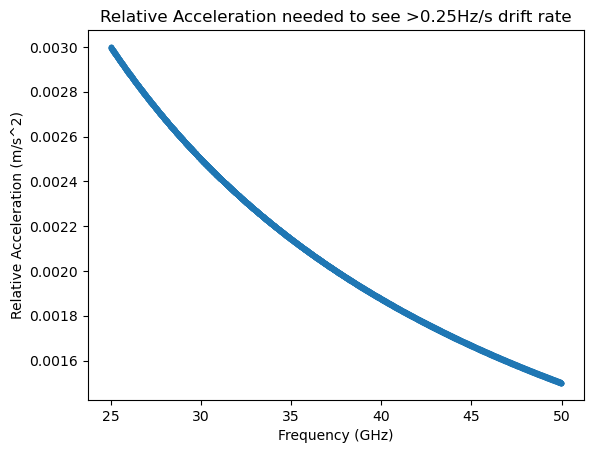

In [15]:
frequencies = np.arange(25e9, 50e9, 1e7) # 25-50GHz
plt.plot(frequencies / 1e9, accel_from_drift(drift_threshold, frequencies), marker='.')
plt.xlabel("Frequency (GHz)")
plt.ylabel("Relative Acceleration (m/s^2)")
plt.title("Relative Acceleration needed to see >0.25Hz/s drift rate")
plt.show()

In [8]:
# So what kind of motion produces a relative acceleration of 0.0030m/s^2?
# Well acceleration from moving in a circle is a = tangential_v^2 / radius
# So we can solve for the radius as r = v^2 / a
# And the average person walks about 1.2m/s
v_human = 1.2 # m/s
a_needed = accel_from_drift(drift_threshold, 25e9)
radius_of_circle = v_human**2 / a_needed
print(f"So COSMIC could detect a human with a 25GHz transmitter walking in a circle with a radius of {radius_of_circle}m ({radius_of_circle * 3.28084}ft)")

So COSMIC could detect a human with a 25GHz transmitter walking in a circle with a radius of 480.0m (1574.8032ft)


In [9]:
# But what (max) accelerations are we going to see for satellites in orbit? 
# Obviously a geostationary satellite would be an acceleration of 0
# Because its orbital velocity is the same speed the ground is moving

In [10]:
geostationary_altitude = 35_786_000 # meters
geostationary_radius = geostationary_altitude + radius # meters

# Given a distance from the center of the Earth, what's the 
# velocity of a stable circular orbit?
# Returns velocity in m/s
def orbital_velocity_earth(r):
    G = 6.67e-11 # G units in SI
    M = 5.927e24 # kg
    return np.sqrt(G * M / r)

geostationary_v = orbital_velocity_earth(geostationary_radius)

# Double check the math, should be that it completes one orbit in one day
geostationary_circumference = geostationary_radius * 2 * np.pi # m
geostationary_orbital_time = geostationary_circumference / geostationary_v 
print(geostationary_orbital_time / 86400 )

1.001129576536307


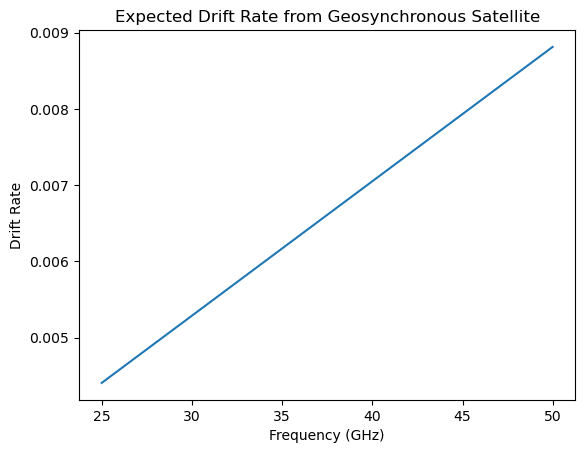

In [11]:
# But what really matters isn't how fast the satellite is traveling in geocentric
# coordinates, but its position (and velocity and acceleration) relative to the 
# observer, us. And because the satellite is at a fixed position relative to us
# it has no relative acceleration.
# However, apparently these satellites *do* drift by about ~10km throughout the day sinusoidally
# So x = 10,000m x sin(2 x pi / 86400 x t) # 86400s per day
# Which means v = 2 x pi / 86400s x 10,000m x cos(2 x pi / 86400 x t)
# and a = (2 x pi / 86400s)^2 x 10,000m x sin(2 x pi / 86400 x t)
# So the maximum acceleration is going to be 
a_max = (2 * np.pi / 86400)**2 * 10_000 # m/s
plt.plot(frequencies/1e9, drift_rate(a_max, frequencies))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Drift Rate")
plt.title("Expected Drift Rate from Geosynchronous Satellite")
plt.show()

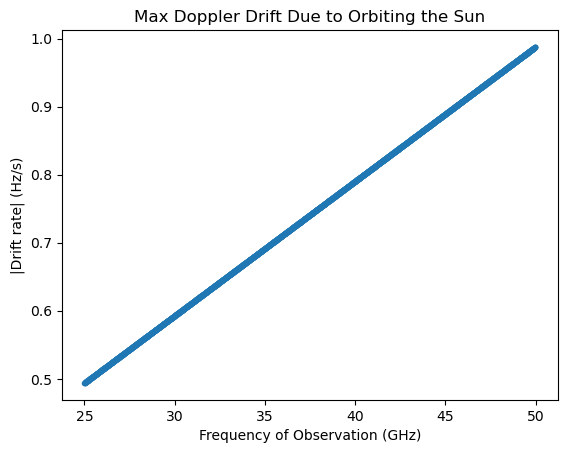

In [12]:
# What about orbital velocity around the sun?

# Given a distance from the center of the sun, what's the 
# velocity of a stable circular orbit?
# Returns velocity in m/s
def orbital_velocity_sun(r):
    G = 6.67e-11 # G units in SI
    M = 1.989e30 # kg
    return np.sqrt(G * M / r)

# Find acceleration from motion around the sun
au = 1.496e11
earth_v = orbital_velocity_sun(au)
earth_a = earth_v**2 / au

# Plot results
plt.plot(frequencies / 1e9, drift_rate(earth_a, frequencies), marker='.')
plt.xlabel("Frequency of Observation (GHz)")
plt.ylabel("|Drift rate| (Hz/s)")
plt.title("Max Doppler Drift Due to Orbiting the Sun")
plt.show()

In [13]:
# From Li et Al (2023)
# They predict a 'relative drift rate' (drift rate / frequency) of ~50nHz (or 50Hz/s @ 1GHz)
# What does that look like at 25-50GHz?
rel_drift_rate_cutoff = 50e-9 # drift rate / frequency cutoff for 99% on exoplanets
print(rel_drift_rate_cutoff * 25e9, "Hz/s")
print(rel_drift_rate_cutoff * 50e9, "Hz/s")

1250.0 Hz/s
2500.0 Hz/s


In [14]:
# So what "standard drift rate" should we expect from our sensitivity?
# About 50x less, so 50hz/s sensitivity @ 50GHz is the same acceleraiton as 1hz/s sensitivity @ 1GHz